In [1]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 10001  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
TEST_SIZE = 0.2
# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [3]:
X ,y = datasets.make_moons(n_samples=N_SAMPLES,
                           shuffle=True,
                           noise=NOISE,
                           random_state=RANDOM_STATE)

X.shape,y.shape

((1000, 2), (1000,))

In [4]:
y=pd.get_dummies(y).to_numpy()
X.shape,y.shape

((1000, 2), (1000, 2))

In [5]:
X_train, X_test ,y_train, y_test =train_test_split(X,y,random_state=RANDOM_STATE,stratify=y,test_size=TEST_SIZE )



## Multilayer Perceptron using  SoftMax at output layer and Tanh as a activation function at hidden layer

### Tanh Activation

In [6]:
def fn_actv(z):
    return np.tanh(z)

def fn_actv_prime(a):
    return 1-np.tanh(a)**2


# Softamx Acitivation

In [7]:

def fn_softmax(z):
    exp_sc = np.exp(z)
    return (exp_sc/np.sum(exp_sc,axis=1,keepdims=True))

In [8]:
pred = fn_softmax(np.array([[8,5,1],[-10,0,10]]))
pred

array([[9.51747406e-01, 4.73847131e-02, 8.67881295e-04],
       [2.06106005e-09, 4.53978686e-05, 9.99954600e-01]])

In [9]:
pred.sum(axis=1)

array([1., 1.])

# Loss Calculation

In [10]:
def calculate_loss(model,X,y):
    w1,w2,b1,b2 = model['W1'],model['W2'],model['b1'],model['b2']
    m = X.shape[0]
            #Layer 1
    z1 = X.dot(w1)+b1
    a1 = fn_actv(z1)
            
            #Layer 2
    z2 = a1.dot(w2)+b2
    a2 = fn_softmax(z2)

    data_loss = -(y*np.log(a2)+ (1-y)*np.log(1-a2)).sum()

    return  1./m*data_loss

### Prediciton

In [11]:
def predict(model,X):
    
    w1,w2,b1,b2 = model['W1'],model['W2'],model['b1'],model['b2']
            
            #Layer 1
    z1 = X.dot(w1)+b1
    a1 = fn_actv(z1)
            
            #Layer 2
    z2 = a1.dot(w2)+b2
    a2 = fn_softmax(z2)
    return np.argmax(a2,axis=1)

In [12]:
nn_input_dim =X_train.shape[1]
nn_hdim = 4
nn_output_dim=2
hist={}

# Training

In [13]:
def build_model(X,y, alpha=ALPHA, n_epoch=EPOCHS):
    w1 = np.random.rand(nn_input_dim,nn_hdim)/np.sqrt(nn_input_dim)
    w2 = np.random.rand(nn_hdim,nn_output_dim)/np.sqrt(nn_input_dim)

    b1 = np.zeros((1,nn_hdim)) 
    b2 = np.zeros((1,nn_output_dim)) 

    curr_loss=0
    loss ,epoch =[],[]
    m=X.shape[0]
    errors=[]
    for i in range(n_epoch):
        #forward propagation
            
        #Layer 1train
        z1 = X.dot(w1)+b1
        a1 = fn_actv(z1)
                
                #Layer 2
        z2 = a1.dot(w2)+b2
        a2 = fn_softmax(z2)

        #######################
        #Back propagation       
        #Layer 2
        dz2 = a2-y
        #print(dz2)
        assert(z2.shape == dz2.shape),f'error z2 {z2.shape}/{dz2.shape})'

        dw2 =( a1.T).dot(dz2)
        assert(w2.shape == dw2.shape),f'error w2 {w2.shape}/{dw2.shape}'

        db2 =np.sum(dz2,axis=0,keepdims=True)
        assert(b2.shape == db2.shape),f'error b2 {b2.shape}/{db2.shape}'

        da1 = dz2.dot(w2.T)

        #Layer 1
        dz1 = da1*fn_actv_prime(z1)

        dw1 =( X.T).dot(dz1)
        assert(w1.shape == dw1.shape),f'error w1 {w1.shape}/{dw1.shape}'

        db1 =np.sum(dz1,axis=0,keepdims=True)
        assert(b1.shape == db1.shape),f'error b1 {b1.shape}/{db1.shape}'

        w1 += -alpha*dw1/m #gradient update
        w2 += -alpha*dw2/m #gradient update
        b1 += -alpha*db1/m #gradient update
        b2 += -alpha*db2/m #gradient update

        model ={'W1':w1, 'W2':w2,'b1':b1,'b2':b2 }

        if i%100==0:
            curr_loss = calculate_loss(model,X,y)
            loss.append(curr_loss)
            epoch.append(i)
            print (f'Epoch {i} :  Current loss : {curr_loss  : .5f}')
        
        
        hist['loss']=loss
        hist['epochs']=epoch
    return model

In [14]:
model = build_model(X_train,y_train)

Epoch 0 :  Current loss :  1.35437
Epoch 100 :  Current loss :  0.75379
Epoch 200 :  Current loss :  0.62636
Epoch 300 :  Current loss :  0.61040
Epoch 400 :  Current loss :  0.60622
Epoch 500 :  Current loss :  0.60263
Epoch 600 :  Current loss :  0.59779
Epoch 700 :  Current loss :  0.59061
Epoch 800 :  Current loss :  0.57983
Epoch 900 :  Current loss :  0.56421
Epoch 1000 :  Current loss :  0.54323
Epoch 1100 :  Current loss :  0.51780
Epoch 1200 :  Current loss :  0.49001
Epoch 1300 :  Current loss :  0.46205
Epoch 1400 :  Current loss :  0.43549
Epoch 1500 :  Current loss :  0.41107
Epoch 1600 :  Current loss :  0.38889
Epoch 1700 :  Current loss :  0.36863
Epoch 1800 :  Current loss :  0.34974
Epoch 1900 :  Current loss :  0.33157
Epoch 2000 :  Current loss :  0.31351
Epoch 2100 :  Current loss :  0.29532
Epoch 2200 :  Current loss :  0.27736
Epoch 2300 :  Current loss :  0.26037
Epoch 2400 :  Current loss :  0.24504
Epoch 2500 :  Current loss :  0.23168
Epoch 2600 :  Current lo

In [15]:
y_train.shape

(800, 2)

In [16]:
def fn_plot_decision_boundary(predict,X_tr,y_tr,X_ts,y_ts):
    
    # initialize the figure
    fig, ax = plt.subplots(figsize = (8,5))
   
    
    # Range of X values (First feature)
    x_min, x_max = X_tr[:, 0].min() - 0.05, X_tr[:, 0].max() + 0.05
    
    # Range of Y values (Second feature)
    y_min, y_max = X_tr[:, 1].min() - 0.05, X_tr[:, 1].max() + 0.05
    
    h=0.01
    # Create a grid to evaluate the object function
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    z= predict((np.c_[xx.ravel(),yy.ravel()]))

    z=z.reshape(xx.shape)
    fig = plt.figure()
    ax = fig.add_axes(111)
    ax.contourf(xx,yy,z,camp=CMAP,)
    ax.scatter(X_tr[:,0],X_tr[:,1],c=np.argmax(y_tr,axis=1),s=30,edgecolor='k',cmap=plt.cm.coolwarm)
    ax.scatter(X_ts[:,0],X_ts[:,1],c=np.argmax(y_ts,axis=1),s=30,marker='*',edgecolor='k',cmap=plt.cm.inferno)

/tmp/ipykernel_27085/82599991.py:23: UserWarning: The following kwargs were not used by contour: 'camp'
  ax.contourf(xx,yy,z,camp=CMAP,)


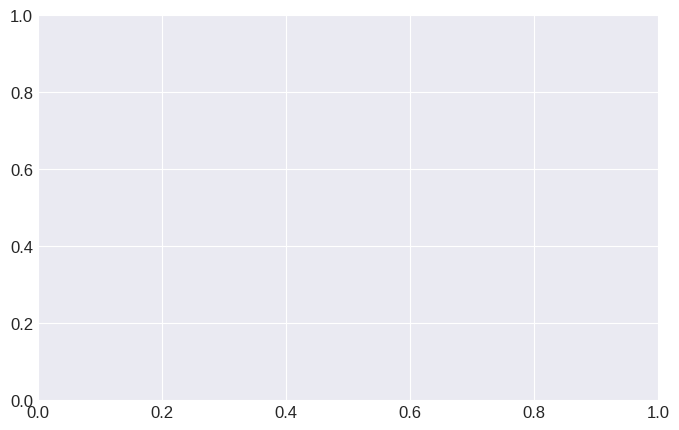

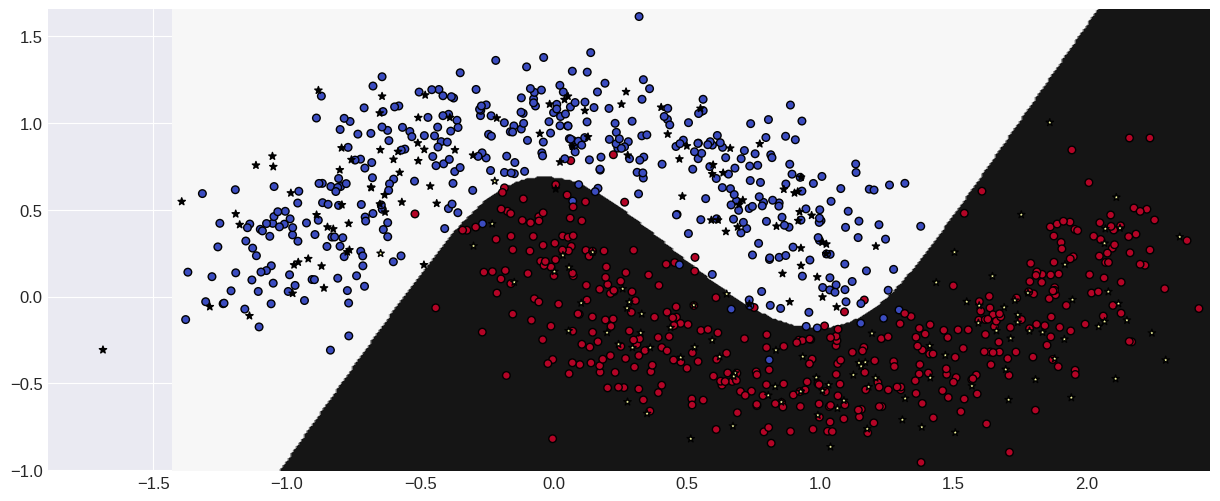

In [17]:
fn_plot_decision_boundary(lambda x:predict(model,x),X_train,y_train,X_test,y_test)